# Zomato Exploratory Data Analysis

# Importing Libraries

In [6]:
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization

%matplotlib inline                       
import seaborn as sns                               # Importing seaborn for visualization

### Loading the datasets 

The csv file has encoding ISO-8859-1.
Encoding defines what kind of characters(ASCII or non ASCII or something different) can be stored in a file.  

In [7]:
zomato_df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')    # Reading file zomato.csv

### Inspecting Data

In [8]:
zomato_df.head(2)                                                  # Visualizing top 5 rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [9]:
country_df = pd.read_excel('Country-Code.xlsx')                         # Reading country code excel file

In [10]:
zomato_data = pd.merge(zomato_df, country_df, on = 'Country Code')      # Pandas Merge function to join two dataframes
zomato_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


### Which countries have the highest number of restaurants in Zomato?

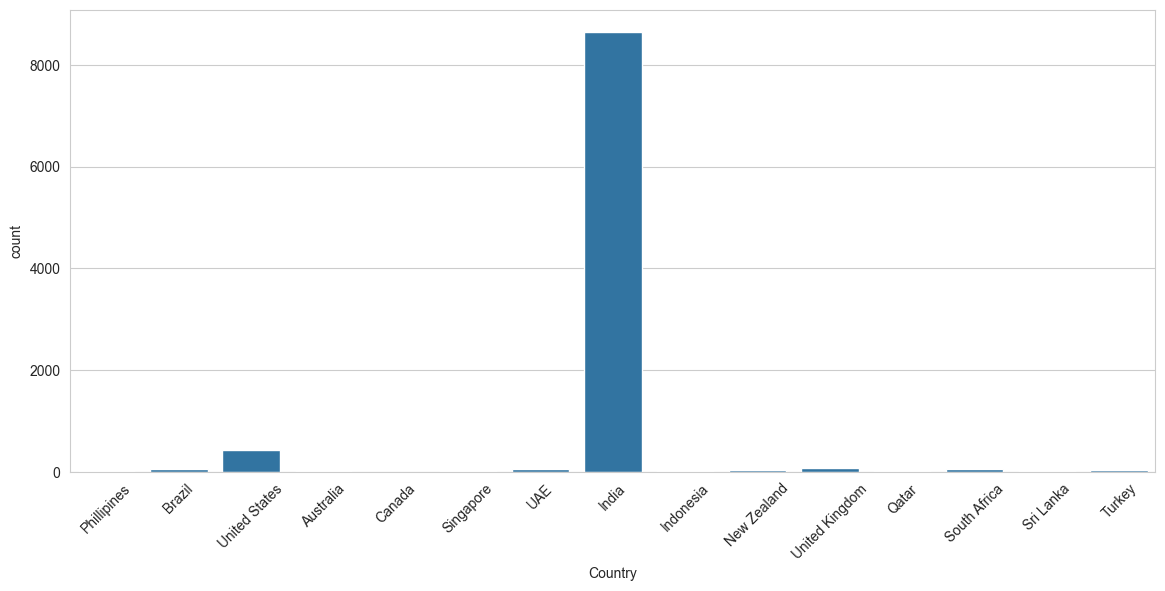

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
sns.countplot(x= 'Country', data=zomato_data)
plt.xticks(rotation=45)
plt.show()

**Observation** <br>
Most of the reataurants are from India. <br>
India - 8652 <br>
World - 9551

### Analysis of Zomato - India

### Zomato India <a id='india'></a>  <br>
 * The number of restaurants registered in Zomato is highest in India.
So lets look at the data of these restaurants.
#### Objective: 
* Our goal is to analyze which restaurants have poor ratings in Zomato and why?

In [12]:
zomato_india = zomato_data[zomato_data['Country'] == 'India']    # Filter the country by India and create a new dataframe
zomato_india.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India


**We have aggregate ratings and Rating text as two column of interest.**

In [13]:
zomato_india.groupby('Rating text').mean()              # Perform groupby using Rating text

TypeError: agg function failed [how->mean,dtype->object]

**Excellent and Very Good** food ratings are provided in restaurants which are slightly premium cost and high price range.
They also have huge number of votes. This can be due to high quality food or ambience due to which the price is high and so the ratings are good. 

<Axes: xlabel='Rating text', ylabel='Average Cost for two'>

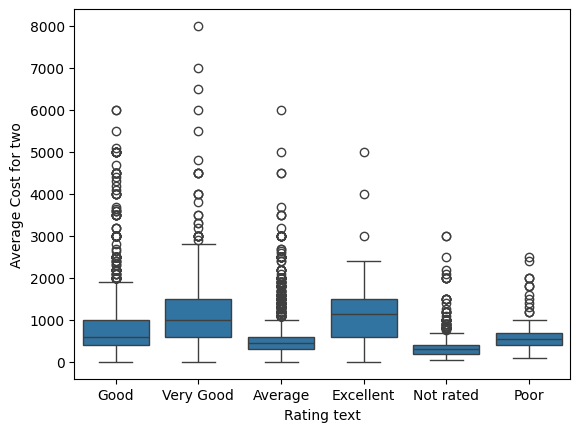

In [ ]:
# Relationship between Average Cost for two and Rating text

sns.boxplot(y = 'Average Cost for two', x = 'Rating text', data = zomato_india)

Ratings improve as the average cost for two increases.

<Axes: xlabel='Rating text', ylabel='Price range'>

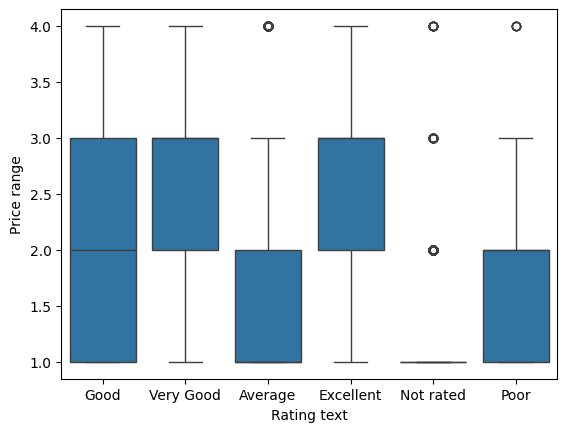

In [ ]:
# Relationship between Price range and Rating text

sns.boxplot(y = 'Price range', x = 'Rating text', data = zomato_india)

**Excellent and Very Good** restaurants have very high price.  <br>
**Average and Poor** have the lowest price range.

### Lets identify restaurants which have high price range and low ratings

In [ ]:
zomato_india['Price range'].value_counts()

Price range
1    4295
2    2858
3    1111
4     388
Name: count, dtype: int64

In [ ]:
# Lets have a look at the expensive restaurants

exp_india_restaurant = zomato_india[zomato_india['Price range'] == 4]
exp_india_restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,No,4,4.0,Green,Very Good,41,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,No,No,No,No,4,3.8,Yellow,Good,46,India
638,3400350,Bon Barbecue,1,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"North Indian, Chinese, Continental",...,No,No,No,No,4,3.8,Yellow,Good,57,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,3900010,The Great Kabab Factory - Radisson Hotel,1,Varanasi,"Radisson Hotel, The Mall Road, Nadesar, Varanasi","Radisson Hotel, Nadesar","Radisson Hotel, Nadesar, Varanasi",82.980810,25.338373,"North Indian, Mughlai",...,No,No,No,No,4,3.3,Orange,Average,67,India
9252,3900055,I:ba Cafe & Restaurant,1,Varanasi,"B 3/335, Krimkund, Shivala, Varanasi",Shivala,"Shivala, Varanasi",0.000000,0.000000,"Japanese, American, North Indian, Fast Food",...,No,No,No,No,4,3.5,Yellow,Good,83,India
9260,2800052,The Square - Hotel Novotel,1,Vizag,"Hotel Novotel, Beach Road, Maharani Peta, Vizag","Hotel Novotel, Maharani Peta","Hotel Novotel, Maharani Peta, Vizag",83.315935,17.710690,"Continental, North Indian",...,No,No,No,No,4,4.1,Green,Very Good,125,India
9262,2800856,Barbeque Nation,1,Vizag,"1st Floor, ATR Towers, Harbour Park Road, Pan...",Kirlampudi Layout,"Kirlampudi Layout, Vizag",0.000000,0.000000,"North Indian, Chinese, Mediterranean",...,No,No,No,No,4,4.9,Dark Green,Excellent,345,India


In [ ]:
# Lets check the ratings of these restaurants

exp_india_restaurant['Rating text'].value_counts()

Rating text
Good         167
Very Good     97
Average       88
Excellent     20
Not rated     11
Poor           5
Name: count, dtype: int64

**As the price range is high, most of the ratings are good.**  <br>
So if price is high, why will be there be 5 poor ratings?

In [ ]:
# Low rated expensive restaurants

exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1247,306134,The Wine Company,1,Gurgaon,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.089048,28.496228,"Italian, European",...,Yes,No,No,No,4,2.4,Red,Poor,2412,India
8045,718,Americana Kitchen and Bar,1,Noida,"Ist Floor, 1-6, Centre Stage Mall, Sector 18, ...","Centre Stage Mall, Sector 18","Centre Stage Mall, Sector 18, Noida",77.322828,28.568343,"American, Tex-Mex, Italian, Mexican, North Indian",...,Yes,No,No,No,4,2.4,Red,Poor,221,India
8467,4717,RPM - Zanzi Bar,1,Noida,"B-110, Gautam Budh Nagar, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.325299,28.570669,"Chinese, North Indian",...,Yes,No,No,No,4,2.4,Red,Poor,103,India
9050,3212,Chicane,1,Noida,"205-A, 1st Floor, Spice World Mall, Sector 25-...","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.341021,28.585493,"European, North Indian, Chinese",...,Yes,No,No,No,4,2.2,Red,Poor,116,India
9105,3237,Club Ice Cube,1,Noida,"313, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326475,28.568067,"North Indian, Continental, Chinese",...,Yes,No,No,No,4,2.0,Red,Poor,230,India


In [ ]:
list_of_cuisines = exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']['Cuisines']
list_of_cuisines.values

array(['Italian, European',
       'American, Tex-Mex, Italian, Mexican, North Indian',
       'Chinese, North Indian', 'European, North Indian, Chinese',
       'North Indian, Continental, Chinese'], dtype=object)

**Observations**: These are 5 restaurants which are really expensive but do not have good ratings. <br>
**Lets have a look at what is their cuisines.**

In [ ]:
text = ' '.join([j for j in list_of_cuisines.values])
text

'Italian, European American, Tex-Mex, Italian, Mexican, North Indian Chinese, North Indian European, North Indian, Chinese North Indian, Continental, Chinese'

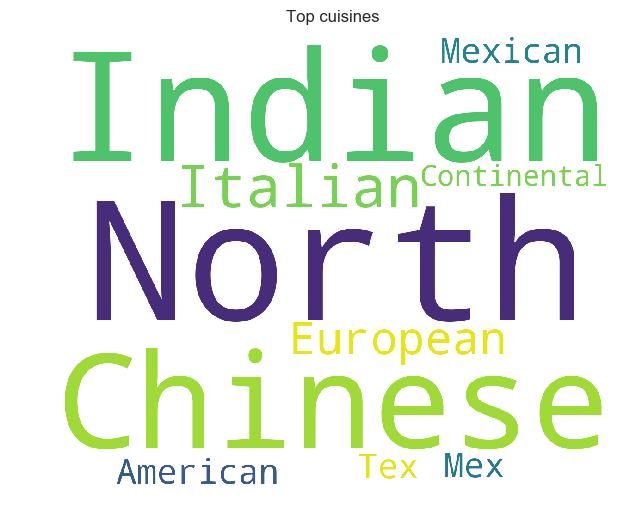

In [ ]:
# Wordcloud of Cuisine

from wordcloud import WordCloud

plt.figure(figsize = (12, 6))
text = ' '.join([j for j in list_of_cuisines.values])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top cuisines')
plt.axis("off")
plt.show()

**North Indian** is the most popular cuisine. So we can infer that these North Indian restaurants in Gurgaon and Noida which do not provide authentic North Indian dishes and that is why customers are unhappy and rate them poorly.

### Lets look at all the restaurants which have poor ratings.

In [ ]:
bad_rated_restaurants = zomato_india[zomato_india['Rating text'] == 'Poor']
bad_rated_restaurants(5)

TypeError: 'DataFrame' object is not callable

In [ ]:
bad_rated_restaurants.shape

(180, 22)

In [ ]:
bad_rated_restaurants['Has Online delivery'].value_counts()

Yes    116
No      64
Name: Has Online delivery, dtype: int64

In [ ]:
bad_rated_restaurants['Is delivering now'].value_counts()

No     179
Yes      1
Name: Is delivering now, dtype: int64

**Many of these restaurants are not available for delivery most of the time. Hence people provide poor rating to them.**

### City wise Analysis of Poor Rated restaurants

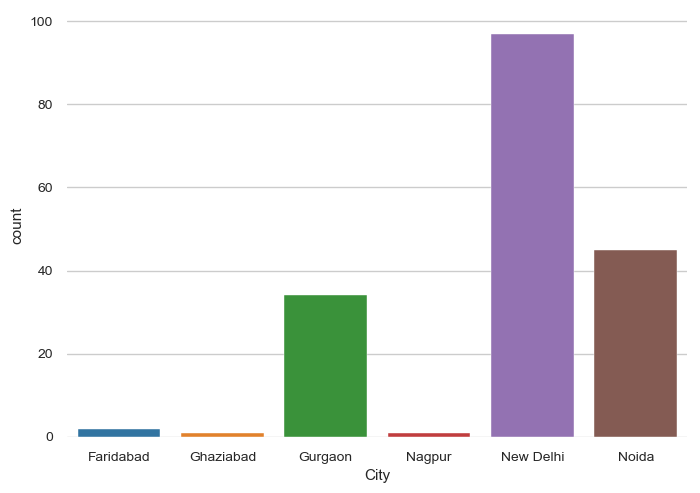

In [ ]:
sns.countplot(x = 'City', data = bad_rated_restaurants)

**Why are ratings of New Delhi, Noida and Gurgaon bad?**

In [ ]:
# Total no. of bad restaurants

bad_rated_restaurants['City'].value_counts()

New Delhi    97
Noida        45
Gurgaon      34
Faridabad     2
Ghaziabad     1
Nagpur        1
Name: City, dtype: int64

In [ ]:
# Total number of restaurants

top_3_cities = zomato_india['City'].value_counts().head(3)
top_3_cities

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

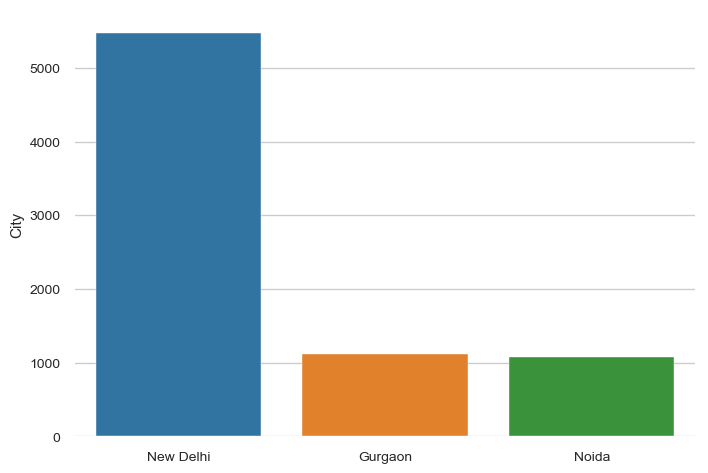

In [ ]:
sns.barplot(y = top_3_cities, x = top_3_cities.index)

**Hence we cannot conclude that these 3 cities have significantly large number of bad restaurants as the total number of restaurants is also high.**

### Let's make our plots interactive using Plotly-express

In [ ]:
import plotly_express as px

In [ ]:
# Scatter Plot

px.scatter(zomato_data, x="Average Cost for two", y="Votes", size="Votes", color="Rating text", log_x=True, size_max=60,hover_name='City')

**Observation**: We can see how the Average Cost for two and the Votes are related and in which cities. 

In [ ]:
# Scatter Plot

px.scatter_matrix(zomato_data, dimensions=['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], color='Rating text')

**Observation** : There is not much correlation between the variables.

In [ ]:
# Box plot of Rating text and Average Cost for two

px.box(zomato_india, x="Rating text", y="Average Cost for two", color="Price range", notched=True)

**Observation**: Good and Very Good food have very high cost as compared to excellent and other types of food.

In [ ]:
# Relationship between Online Delivery and Aggregate rating

px.histogram(zomato_data, x="Has Online delivery", y="Aggregate rating", histfunc="avg")

**Observations**: Restaurants which have online delivery have better ratings.

In [ ]:
px.histogram(zomato_data, x="Has Table booking", y="Aggregate rating", histfunc="avg")

**Observations**: Restaurants which have table booking available have more ratings in general.

In [ ]:
px.histogram(zomato_data, x="Is delivering now", y="Aggregate rating", histfunc="avg")

**Observation**: Restaurants which are delivering now have better ratings than the one which are not.